<a href="https://colab.research.google.com/github/adewale-codes/Machine_learning/blob/main/full_pipeline_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction: Feature Engineering + Model Training
This notebook combines feature engineering and machine learning model training for heart disease prediction using a clinical dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set(style='whitegrid')

##Load Dataset

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##Drop Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

##Create Age Group Feature

In [ ]:
bins = [0, 39, 59, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

##Bin Cholesterol Levels

In [ ]:
bins = [0, 200, 239, np.inf]
labels = ['Normal', 'Borderline', 'High']
df['CholesterolLevel'] = pd.cut(df['Cholesterol'], bins=bins, labels=labels)

##One-Hot Encode Categorical Features

In [ ]:
df_encoded = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope', 'AgeGroup', 'CholesterolLevel'], drop_first=True)

##Label Encode Binary Features

In [ ]:
le = LabelEncoder()
df_encoded['Sex'] = le.fit_transform(df_encoded['Sex'])
df_encoded['ExerciseAngina'] = le.fit_transform(df_encoded['ExerciseAngina'])

##Scale Numeric Features

In [ ]:
scaler = MinMaxScaler()
num_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

##Train-Test Split

In [ ]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Train Models

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

##Evaluate Models


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



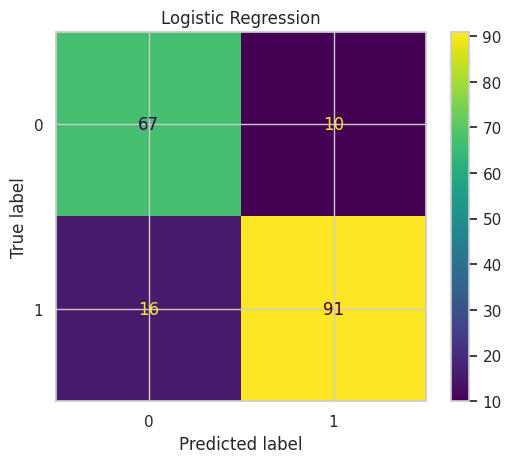


Decision Tree Results
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.85      0.86      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



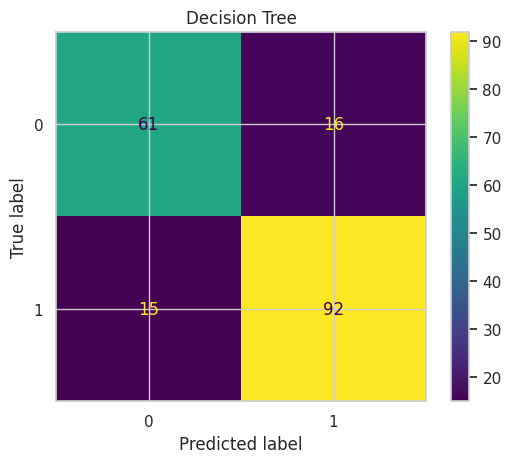


Random Forest Results
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



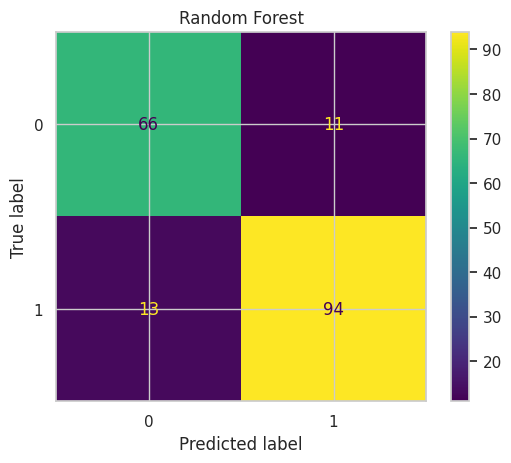

In [ ]:
models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}
for name, model in models.items():
    print(f"\n{name} Results")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title(name)
    plt.show()

##Summary
- Feature engineering: binning, encoding, and scaling
- Trained Logistic Regression, Decision Tree, and Random Forest
- Evaluated with metrics and confusion matrices